<a href="https://colab.research.google.com/github/Maspie/Data-Preprocessing/blob/main/data_processing_on_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install category_encoders


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty
from category_encoders import BinaryEncoder



In [ ]:
df=pd.read_csv('/content/train_BRCpofr.csv')

In [ ]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
df['area'].unique()
df['area'] = (df['area'] == "Urban").astype(int)

df['gender'] = (df['gender'] == "Male").astype(int)



In [ ]:
encoder = BinaryEncoder(cols=['qualification'], return_df=True)
df = encoder.fit_transform(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               89392 non-null  int64 
 1   gender           89392 non-null  int64 
 2   area             89392 non-null  int64 
 3   qualification_0  89392 non-null  int64 
 4   qualification_1  89392 non-null  int64 
 5   income           89392 non-null  object
 6   marital_status   89392 non-null  int64 
 7   vintage          89392 non-null  int64 
 8   claim_amount     89392 non-null  int64 
 9   num_policies     89392 non-null  object
 10  policy           89392 non-null  object
 11  type_of_policy   89392 non-null  object
 12  cltv             89392 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 8.9+ MB


In [ ]:
import re

def calculate_midpoint(income_str):
    numbers = re.findall(r'\d+', income_str)
    numbers = [float(num) * 1e5 for num in numbers]

    if len(numbers) == 2:
        midpoint = sum(numbers) / 2
    elif len(numbers) == 1:
        midpoint = numbers[0]
    else:
        midpoint = 0

    return midpoint

df['income_midpoint'] = df['income'].apply(calculate_midpoint)
df = df.drop('income', axis=1)
df = df.rename(columns={'income_midpoint': 'income'})
df = df.drop('id', axis=1)

In [ ]:
df.head()

,gender,area,qualification_0,qualification_1,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,income
0,1,1,0,1,1,5,5790,More than 1,A,Platinum,64308,750000.0
1,1,0,1,0,0,8,5080,More than 1,A,Platinum,515400,750000.0
2,1,1,0,1,1,8,2599,More than 1,A,Platinum,64212,750000.0
3,0,0,1,0,0,7,0,More than 1,A,Platinum,97920,750000.0
4,1,1,1,0,1,6,3508,More than 1,A,Gold,59736,1000000.0


In [ ]:
df['num_policies'].unique()
df['num_policies'] = (df['num_policies'] == "More than 1").astype(int)


In [ ]:
df['policy'].unique()
encoder = BinaryEncoder(cols=['policy'], return_df=True)
df = encoder.fit_transform(df)

In [ ]:
df.head()

,gender,area,qualification_0,qualification_1,marital_status,vintage,claim_amount,num_policies,policy_0,policy_1,type_of_policy,cltv,income
0,1,1,0,1,1,5,5790,1,0,1,Platinum,64308,750000.0
1,1,0,1,0,0,8,5080,1,0,1,Platinum,515400,750000.0
2,1,1,0,1,1,8,2599,1,0,1,Platinum,64212,750000.0
3,0,0,1,0,0,7,0,1,0,1,Platinum,97920,750000.0
4,1,1,1,0,1,6,3508,1,0,1,Gold,59736,1000000.0


In [ ]:
df['type_of_policy'].unique()
encoder = BinaryEncoder(cols=['type_of_policy'], return_df=True)
df = encoder.fit_transform(df)

In [ ]:
df.head()

,gender,area,qualification_0,qualification_1,marital_status,vintage,claim_amount,num_policies,policy_0,policy_1,type_of_policy_0,type_of_policy_1,cltv,income
0,1,1,0,1,1,5,5790,1,0,1,0,1,64308,750000.0
1,1,0,1,0,0,8,5080,1,0,1,0,1,515400,750000.0
2,1,1,0,1,1,8,2599,1,0,1,0,1,64212,750000.0
3,0,0,1,0,0,7,0,1,0,1,0,1,97920,750000.0
4,1,1,1,0,1,6,3508,1,0,1,1,0,59736,1000000.0


In [ ]:
df['num_policies'].unique()

array([1, 0])

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


gender              0
area                0
qualification_0     0
qualification_1     0
marital_status      0
vintage             0
claim_amount        0
num_policies        0
policy_0            0
policy_1            0
type_of_policy_0    0
type_of_policy_1    0
cltv                0
income              0
dtype: int64


### **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
scaler = MinMaxScaler()
df[['vintage', 'claim_amount', 'income']] = scaler.fit_transform(df[['vintage', 'claim_amount', 'income']])

In [ ]:
df.head()

,gender,area,qualification_0,qualification_1,marital_status,vintage,claim_amount,num_policies,policy_0,policy_1,type_of_policy_0,type_of_policy_1,cltv,income
0,1,1,0,1,1,0.625,0.181539,1,0,1,0,1,64308,0.6875
1,1,0,1,0,0,1.000,0.159278,1,0,1,0,1,515400,0.6875
2,1,1,0,1,1,1.000,0.081489,1,0,1,0,1,64212,0.6875
3,0,0,1,0,0,0.875,0.000000,1,0,1,0,1,97920,0.6875
4,1,1,1,0,1,0.750,0.109989,1,0,1,1,0,59736,1.0000


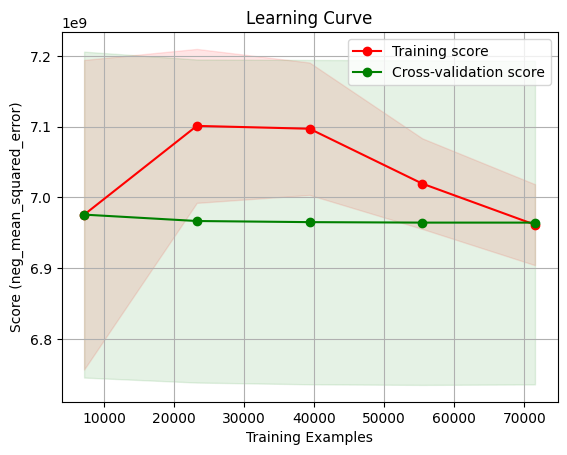

{'MSE': 6790291507.623521, 'R^2': 0.1514118981016629}

In [ ]:
X = df.drop('cltv', axis=1)
y = df['cltv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = lin_reg.coef_
intercept = lin_reg.intercept_
performance = {'MSE': mse, 'R^2': r2}

# Generate learning curves for the linear regression model
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = lin_reg,
    X = X,
    y = y,
    train_sizes = np.linspace(0.1, 1.0, 5),
    cv = 5,
    scoring = 'neg_mean_squared_error'
)

# Calculate mean and standard deviation for training set scores
train_scores_mean = -train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (neg_mean_squared_error)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

performance

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

performance = {'MSE': mse, 'R^2': r2}
performance

{'MSE': 13984190700.896622, 'R^2': -0.7476153755895836}

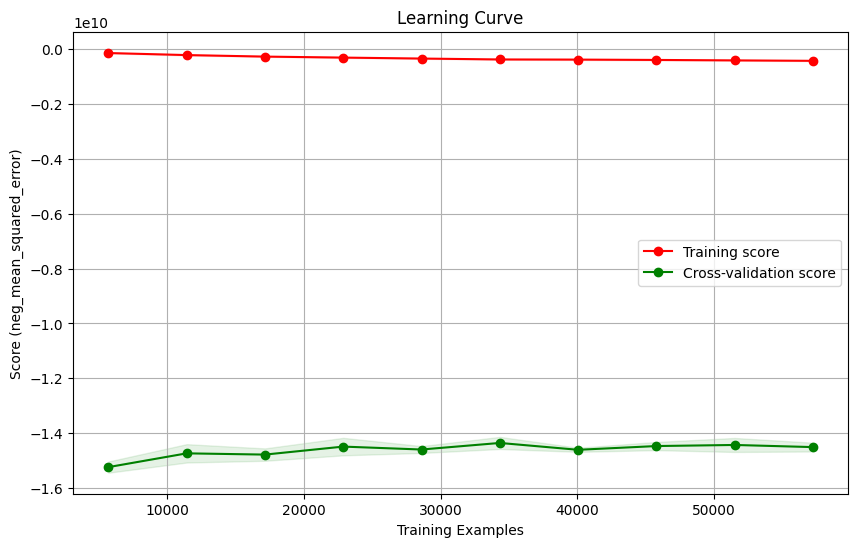

In [ ]:

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score (neg_mean_squared_error)")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curve(tree_reg, X_train, y_train)

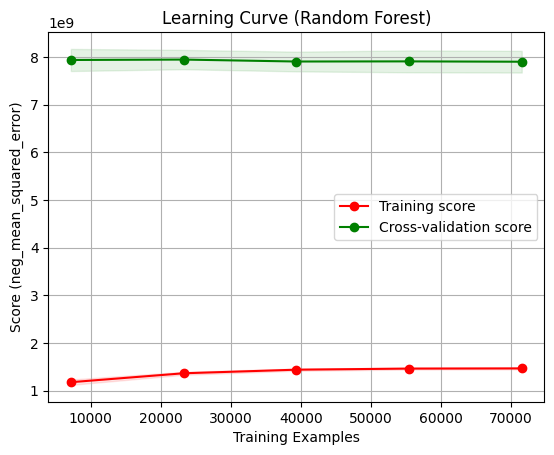

{'MSE': 7719721740.580108, 'R^2': 0.03526026656330039}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = rand_forest.predict(X_test)

# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

performance_rf = {'MSE': mse_rf, 'R^2': r2_rf}

# Generate learning curves for the Random Forest model
train_sizes_rf, train_scores_rf, validation_scores_rf = learning_curve(
    estimator=rand_forest,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Calculate mean and standard deviation for training set scores
train_scores_mean_rf = -train_scores_rf.mean(axis=1)
train_scores_std_rf = train_scores_rf.std(axis=1)

# Calculate mean and standard deviation for test set scores
validation_scores_mean_rf = -validation_scores_rf.mean(axis=1)
validation_scores_std_rf = validation_scores_rf.std(axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Examples")
plt.ylabel("Score (neg_mean_squared_error)")
plt.grid()

plt.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                 train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, validation_scores_mean_rf - validation_scores_std_rf,
                 validation_scores_mean_rf + validation_scores_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, validation_scores_mean_rf, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

performance_rf

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Evaluate the performance
mse_gnb = mean_squared_error(y_test, y_pred_gnb)
r2_gnb = r2_score(y_test, y_pred_gnb)

performance_gnb = {'MSE': mse_gnb, 'R^2': r2_gnb}

# No learning curve is typically generated for Naive Bayes as it's not very informative for this kind of model
# because Naive Bayes doesn't really "learn" in the iterative way that models like Decision Trees or Neural Networks do.
# However, if you still want to plot it for comparison, you can follow the same steps as before.

# Print out the performance metrics
print(performance_gnb)

{'MSE': 21119818110.084904, 'R^2': -1.6393603783215864}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

# Transform our input features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train the model on the transformed features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = poly_model.predict(X_test_poly)

# Evaluate the performance
mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

performance_poly = {'MSE': mse_poly, 'R^2': r2_poly}

print(performance_poly)

{'MSE': 6736655978.819397, 'R^2': 0.15811477257046969}


In [ ]:
svm_model = SVC(kernel='linear')  # You can choose different kernels such as 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)